In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import photonics.photodiode as fl

from numpy import exp, e
from scipy.optimize import curve_fit
from scipy.integrate import odeint

%matplotlib notebook

Ref: Concentration quenching in erbium implanted alkali silicate glasses, Snoeks

In [34]:
def dndt(n, t, tau=10, C=3E-24, N=1.5E19):
    """
    tau: Spontaneous de-excitation rate (absence of migration-quenching) [ms]
    C: C_Er-Er [m3/s] for sodalime glass
    N: Er concentration [at./cm3]
    """    
    return -n/tau - C*N*n**2

In [35]:
# Time to simulate over
t = np.linspace(0, 100, num=100)

# Starting population inversion
n_list = np.linspace(0, 1, num=100)

In [40]:
y = odeint(dndt, y0=0, t=t)
y = y[:,0]

In [41]:
def decay_fn(t, a, tau, c):
    """Single-exponential decay fluorescence function. t is the time."""
    return a * np.exp(-t / tau) + c

<IPython.core.display.Javascript object>


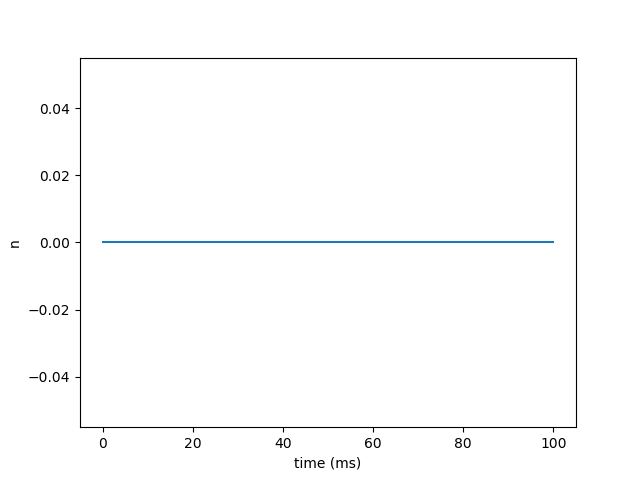

In [42]:
fig, ax = plt.subplots()
ax.plot(t, y)
ax.set_xlabel('time (ms)')
ax.set_ylabel('n')

In [39]:
# Fit a single exp. decay function using Levenberg-Marquardt algorithm
from scipy.optimize import curve_fit
popt, pcov = curve_fit(decay_fn, t, y, p0=[max(y), 10, min(y)])

# Error in coefficients to 1 std.
perr = np.sqrt(np.diag(pcov))

popt, perr

(array([ 0.69243974,  0.76033549,  0.0030624 ]),
 array([ 0.00875619,  0.02466635,  0.00088929]))